한글 폰트 다운로드

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120899 files and direc

# 라이브러리 불러오기 / 기본 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

import os
os.chdir('/content/drive/MyDrive/dacon')

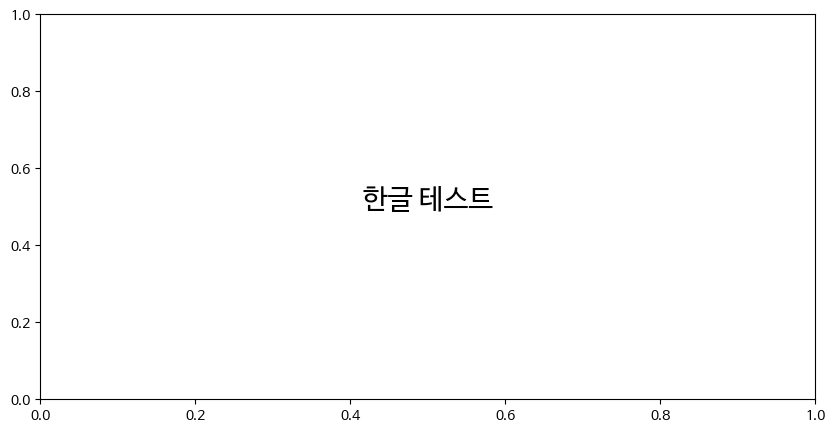

In [ ]:
# 컬럼 생략 없음
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 컬러 팔레트
sns.set_palette("deep")

palette = sns.color_palette("deep")

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 경고 제거
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = font_prop.get_name()

# 경고 테스트
plt.figure(figsize=(10, 5))
plt.text(0.5, 0.5, '한글 테스트', fontproperties=font_prop, size=20, ha='center')
plt.show()

# 데이터 불러오기

In [ ]:
data = pd.read_csv("./data/train.csv")
child = pd.read_excel("./data/대구 어린이 보호 구역 정보.xlsx")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [ ]:
print(child.info())
display(child.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   시설종류      640 non-null    object        
 1   대상시설명     640 non-null    object        
 2   소재지도로명주소  640 non-null    object        
 3   소재지지번주소   640 non-null    object        
 4   위도        640 non-null    float64       
 5   경도        640 non-null    float64       
 6   관리기관명     640 non-null    object        
 7   관할경찰서명    640 non-null    object        
 8   CCTV설치여부  640 non-null    object        
 9   CCTV설치대수  465 non-null    float64       
 10  보호구역도로폭   320 non-null    object        
 11  데이터기준일자   640 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 60.1+ KB
None


,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),대구광역시 남구 이천동 477,35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),대구광역시 남구 대명동 3050,35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23
3,초등학교,남덕초등학교,대구광역시 남구 앞산순환로 93길 33,대구광역시 남구 대명동 531-1,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,6~8,2020-03-23
4,초등학교,대명초등학교,대구광역시 남구 대명로 110,대구광역시 남구 대명동 960,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,6~10,2020-03-23


# 데이터 전처리

## 어린이 보호 구역

### 컬럼1: 시설종류

In [ ]:
# 시설종류
print(child['시설종류'].unique())

['초등학교' '유치원' '어린이집' '특수학교' '학원']


In [ ]:
child['시설종류'].value_counts()

유치원     267
초등학교    209
어린이집    155
특수학교      8
학원        1
Name: 시설종류, dtype: int64

In [ ]:
child[child['시설종류']=='학원']

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
611,학원,김샘학원,대구광역시 수성구 달구벌대로525길 6(만촌동),대구광역시 수성구 만촌동 738-4,35.857335,128.650123,대구광역시 수성구,수성경찰서,Y,NaN,NaN,2019-12-27


### 컬럼2: 대상시설명

In [ ]:
# 대상시설 갯수
print(len(child['대상시설명'].unique()))

538


In [ ]:
name = child['대상시설명'].value_counts() > 1
names = name[name==True].index
print(names)

Index(['죽곡어린이집', '화원초등', '죽곡초등', '천내초등', '하빈면초등', '현풍초등', '화남초등', '화동초등',
       '해맑은유치원', '드림아이유치원',
       ...
       '서재성모유치원', '하빈면초교병설', '용계초교병설', '죽곡초교병설', '옥포초교병설', '세종유치원(성림)',
       '숲속예은유치원', '신영유치원', '신솔정유치원', '이튼어린이집'],
      dtype='object', length=102)


In [ ]:
for n in names[:5]:
    display(child[child['대상시설명'] == n])
    print('-'*30)

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
104,어린이집,죽곡어린이집,대구광역시 달성군 달구벌대로174길17-5,대구광역시 달성군 다사읍 죽곡리 197,35.857921,128.462075,대구광역시 달성군청,달성경찰서,N,0.0,NaN,2019-09-10
203,어린이집,죽곡어린이집,대구광역시 달성군 달구벌대로174길17-5,대구광역시 달성군 다사읍 죽곡리 197,35.857921,128.462075,대구광역시 달성군청,달성경찰서,N,0.0,NaN,2019-09-10


------------------------------


,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
95,초등학교,화원초등,대구광역시 달성군 화원읍 비슬로 2580,대구광역시 달성군 화원읍 천내리 417,35.803331,128.499624,대구광역시 달성군청,달성경찰서,Y,2.0,NaN,2019-09-10
194,초등학교,화원초등,대구광역시 달성군 화원읍 비슬로 2580,대구광역시 달성군 화원읍 천내리 417,35.803331,128.499624,대구광역시 달성군청,달성경찰서,Y,2.0,NaN,2019-09-10


------------------------------


,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
89,초등학교,죽곡초등,대구광역시 달성군 다사읍 죽곡1길 18,대구광역시 달성군 다사읍 죽곡리 189,35.856574,128.463127,대구광역시 달성군청,달성경찰서,Y,2.0,NaN,2019-09-10
188,초등학교,죽곡초등,대구광역시 달성군 다사읍 죽곡1길 18,대구광역시 달성군 다사읍 죽곡리 189,35.856574,128.463127,대구광역시 달성군청,달성경찰서,Y,2.0,NaN,2019-09-10


------------------------------


,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
90,초등학교,천내초등,대구광역시 달성군 화원읍 성천로 192,대구광역시 달성군 화원읍 구라리 1553,35.809409,128.502028,대구광역시 달성군청,달성경찰서,N,0.0,NaN,2019-09-10
189,초등학교,천내초등,대구광역시 달성군 화원읍 성천로 192,대구광역시 달성군 화원읍 구라리 1553,35.809409,128.502028,대구광역시 달성군청,달성경찰서,N,0.0,NaN,2019-09-10


------------------------------


,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
91,초등학교,하빈면초등,대구광역시 달성군 하빈면 하빈로 391-1,대구광역시 달성군 하빈면 현내리 855-3,35.901559,128.442153,대구광역시 달성군청,달성경찰서,N,0.0,NaN,2019-09-10
190,초등학교,하빈면초등,대구광역시 달성군 하빈면 하빈로 391-1,대구광역시 달성군 하빈면 현내리 855-3,35.901559,128.442153,대구광역시 달성군청,달성경찰서,N,0.0,NaN,2019-09-10


------------------------------


In [ ]:
child['대상시설명'].value_counts().max()

2

In [ ]:
not_dup = [] # 명문어린이집, 꿈나무어린이집
for n in names:
    print(n)
    temp = child[child['대상시설명'] == n]['데이터기준일자'].to_frame()
    temp['중복여부'] = child[child['대상시설명'] == n].duplicated()
    display(temp)
    if temp.iloc[-1,-1] ==False:
        not_dup.append(n)
    print('-'*30)

죽곡어린이집


,데이터기준일자,중복여부
104,2019-09-10,False
203,2019-09-10,True


------------------------------
화원초등


,데이터기준일자,중복여부
95,2019-09-10,False
194,2019-09-10,True


------------------------------
죽곡초등


,데이터기준일자,중복여부
89,2019-09-10,False
188,2019-09-10,True


------------------------------
천내초등


,데이터기준일자,중복여부
90,2019-09-10,False
189,2019-09-10,True


------------------------------
하빈면초등


,데이터기준일자,중복여부
91,2019-09-10,False
190,2019-09-10,True


------------------------------
현풍초등


,데이터기준일자,중복여부
92,2019-09-10,False
191,2019-09-10,True


------------------------------
화남초등


,데이터기준일자,중복여부
93,2019-09-10,False
192,2019-09-10,True


------------------------------
화동초등


,데이터기준일자,중복여부
94,2019-09-10,False
193,2019-09-10,True


------------------------------
해맑은유치원


,데이터기준일자,중복여부
96,2019-09-10,False
195,2019-09-10,True


------------------------------
드림아이유치원


,데이터기준일자,중복여부
105,2019-09-10,False
204,2019-09-10,True


------------------------------
꿈이있는숲속유치원


,데이터기준일자,중복여부
97,2019-09-10,False
196,2019-09-10,True


------------------------------
자연숲유치원


,데이터기준일자,중복여부
98,2019-09-10,False
197,2019-09-10,True


------------------------------
키즈랜드어린이집


,데이터기준일자,중복여부
99,2019-09-10,False
198,2019-09-10,True


------------------------------
자연과학어린이집


,데이터기준일자,중복여부
100,2019-09-10,False
199,2019-09-10,True


------------------------------
하늘숲유치원


,데이터기준일자,중복여부
101,2019-09-10,False
200,2019-09-10,True


------------------------------
아이엠어린이집


,데이터기준일자,중복여부
102,2019-09-10,False
201,2019-09-10,True


------------------------------
유가초등


,데이터기준일자,중복여부
88,2019-09-10,False
187,2019-09-10,True


------------------------------
용계초등


,데이터기준일자,중복여부
87,2019-09-10,False
186,2019-09-10,True


------------------------------
왕선초등


,데이터기준일자,중복여부
86,2019-09-10,False
185,2019-09-10,True


------------------------------
옥포초등


,데이터기준일자,중복여부
85,2019-09-10,False
184,2019-09-10,True


------------------------------
서재초등


,데이터기준일자,중복여부
84,2019-09-10,False
183,2019-09-10,True


------------------------------
북동초등


,데이터기준일자,중복여부
83,2019-09-10,False
182,2019-09-10,True


------------------------------
반송초등


,데이터기준일자,중복여부
82,2019-09-10,False
181,2019-09-10,True


------------------------------
명곡초등


,데이터기준일자,중복여부
81,2019-09-10,False
180,2019-09-10,True


------------------------------
매곡초등


,데이터기준일자,중복여부
80,2019-09-10,False
179,2019-09-10,True


------------------------------
동곡초등


,데이터기준일자,중복여부
79,2019-09-10,False
178,2019-09-10,True


------------------------------
도림초등


,데이터기준일자,중복여부
78,2019-09-10,False
177,2019-09-10,True


------------------------------
다사읍초등


,데이터기준일자,중복여부
77,2019-09-10,False
176,2019-09-10,True


------------------------------
남동초등


,데이터기준일자,중복여부
75,2019-09-10,False
174,2019-09-10,True


------------------------------
금포초등


,데이터기준일자,중복여부
74,2019-09-10,False
173,2019-09-10,True


------------------------------
금계초등


,데이터기준일자,중복여부
73,2019-09-10,False
172,2019-09-10,True


------------------------------
구지초등


,데이터기준일자,중복여부
72,2019-09-10,False
171,2019-09-10,True


------------------------------
가창초등


,데이터기준일자,중복여부
71,2019-09-10,False
170,2019-09-10,True


------------------------------
천내어린이집


,데이터기준일자,중복여부
103,2019-09-10,False
202,2019-09-10,True


------------------------------
백설어린이집


,데이터기준일자,중복여부
106,2019-09-10,False
205,2019-09-10,True


------------------------------
화원유치원


,데이터기준일자,중복여부
69,2019-09-10,False
168,2019-09-10,True


------------------------------
서동초등학교


,데이터기준일자,중복여부
131,2019-09-10,False
230,2019-09-10,True


------------------------------
비슬초등학교


,데이터기준일자,중복여부
125,2019-09-10,False
224,2019-09-10,True


------------------------------
비슬유치원


,데이터기준일자,중복여부
126,2019-09-10,False
225,2019-09-10,True


------------------------------
어울림유치원


,데이터기준일자,중복여부
127,2019-09-10,False
226,2019-09-10,True


------------------------------
엘키즈유치원


,데이터기준일자,중복여부
128,2019-09-10,False
227,2019-09-10,True


------------------------------
테크노4초등학교


,데이터기준일자,중복여부
129,2019-09-10,False
228,2019-09-10,True


------------------------------
테크노4유치원


,데이터기준일자,중복여부
130,2019-09-10,False
229,2019-09-10,True


------------------------------
서동유치원


,데이터기준일자,중복여부
132,2019-09-10,False
231,2019-09-10,True


------------------------------
화남어린이집


,데이터기준일자,중복여부
107,2019-09-10,False
206,2019-09-10,True


------------------------------
포산초등학교


,데이터기준일자,중복여부
133,2019-09-10,False
232,2019-09-10,True


------------------------------
포산유치원


,데이터기준일자,중복여부
134,2019-09-10,False
233,2019-09-10,True


------------------------------
세현초등학교


,데이터기준일자,중복여부
135,2019-09-10,False
234,2019-09-10,True


------------------------------
비슬향 유치원


,데이터기준일자,중복여부
136,2019-09-10,False
235,2019-09-10,True


------------------------------
도담소리숲 유치원


,데이터기준일자,중복여부
137,2019-09-10,False
236,2019-09-10,True


------------------------------
옥포예일유치원


,데이터기준일자,중복여부
138,2019-09-10,False
237,2019-09-10,True


------------------------------
대실유치원


,데이터기준일자,중복여부
124,2019-09-10,False
223,2019-09-10,True


------------------------------
대실초등학교


,데이터기준일자,중복여부
123,2019-09-10,False
222,2019-09-10,True


------------------------------
세천유치원


,데이터기준일자,중복여부
122,2019-09-10,False
221,2019-09-10,True


------------------------------
세천초등학교


,데이터기준일자,중복여부
121,2019-09-10,False
220,2019-09-10,True


------------------------------
옥빛유치원


,데이터기준일자,중복여부
120,2019-09-10,False
219,2019-09-10,True


------------------------------
강림초등학교


,데이터기준일자,중복여부
119,2019-09-10,False
218,2019-09-10,True


------------------------------
대영유치원(논공읍대영)


,데이터기준일자,중복여부
118,2019-09-10,False
217,2019-09-10,True


------------------------------
안드레아유치원


,데이터기준일자,중복여부
117,2019-09-10,False
216,2019-09-10,True


------------------------------
서재아이숲유치원


,데이터기준일자,중복여부
116,2019-09-10,False
215,2019-09-10,True


------------------------------
현풍아이세상어린이집(114명)


,데이터기준일자,중복여부
115,2019-09-10,False
214,2019-09-10,True


------------------------------
달성어린이집(139명)


,데이터기준일자,중복여부
114,2019-09-10,False
213,2019-09-10,True


------------------------------
스탠포드어린이집


,데이터기준일자,중복여부
113,2019-09-10,False
212,2019-09-10,True


------------------------------
논공읍어린이집


,데이터기준일자,중복여부
112,2019-09-10,False
211,2019-09-10,True


------------------------------
세계어린이집


,데이터기준일자,중복여부
111,2019-09-10,False
210,2019-09-10,True


------------------------------
소호어린이집


,데이터기준일자,중복여부
110,2019-09-10,False
209,2019-09-10,True


------------------------------
혜민어린이집


,데이터기준일자,중복여부
109,2019-09-10,False
208,2019-09-10,True


------------------------------
옥스포드어린이집


,데이터기준일자,중복여부
108,2019-09-10,False
207,2019-09-10,True


------------------------------
화원큰별유치원


,데이터기준일자,중복여부
70,2019-09-10,False
169,2019-09-10,True


------------------------------
논공읍초등


,데이터기준일자,중복여부
76,2019-09-10,False
175,2019-09-10,True


------------------------------
화원꽃들유치원(공립)


,데이터기준일자,중복여부
68,2019-09-10,False
167,2019-09-10,True


------------------------------
논공읍초교병설


,데이터기준일자,중복여부
44,2019-09-10,False
143,2019-09-10,True


------------------------------
매곡초교병설


,데이터기준일자,중복여부
50,2019-09-10,False
149,2019-09-10,True


------------------------------
동곡초등학교병설


,데이터기준일자,중복여부
49,2019-09-10,False
148,2019-09-10,True


------------------------------
도림초교병설


,데이터기준일자,중복여부
48,2019-09-10,False
147,2019-09-10,True


------------------------------
대자연유치원


,데이터기준일자,중복여부
47,2019-09-10,False
146,2019-09-10,True


------------------------------
다사읍초교병설


,데이터기준일자,중복여부
46,2019-09-10,False
145,2019-09-10,True


------------------------------
늘푸른유치원


,데이터기준일자,중복여부
45,2019-09-10,False
144,2019-09-10,True


------------------------------
금포초교병설


,데이터기준일자,중복여부
43,2019-09-10,False
142,2019-09-10,True


------------------------------
골든벨유치원(새순->예정)


,데이터기준일자,중복여부
52,2019-09-10,False
151,2019-09-10,True


------------------------------
금계초교병설


,데이터기준일자,중복여부
42,2019-09-10,False
141,2019-09-10,True


------------------------------
가창초교병설


,데이터기준일자,중복여부
40,2019-09-10,False
139,2019-09-10,True


------------------------------
파란나라어린이집


,데이터기준일자,중복여부
497,2019-09-24,False
527,2019-12-27,False


------------------------------
현풍초교병설


,데이터기준일자,중복여부
67,2019-09-10,False
166,2019-09-10,True


------------------------------
명문어린이집


,데이터기준일자,중복여부
444,2019-12-17,False
489,2019-09-24,False


------------------------------
꿈나무어린이집


,데이터기준일자,중복여부
509,2019-12-27,False
639,2019-06-01,False


------------------------------
반송초교병설


,데이터기준일자,중복여부
51,2019-09-10,False
150,2019-09-10,True


------------------------------
구지초교병설


,데이터기준일자,중복여부
41,2019-09-10,False
140,2019-09-10,True


------------------------------
서재초교병설


,데이터기준일자,중복여부
53,2019-09-10,False
152,2019-09-10,True


------------------------------
왕선초교병설


,데이터기준일자,중복여부
61,2019-09-10,False
160,2019-09-10,True


------------------------------
장원유치원


,데이터기준일자,중복여부
64,2019-09-10,False
163,2019-09-10,True


------------------------------
유가초교병설


,데이터기준일자,중복여부
63,2019-09-10,False
162,2019-09-10,True


------------------------------
서재성모유치원


,데이터기준일자,중복여부
54,2019-09-10,False
153,2019-09-10,True


------------------------------
하빈면초교병설


,데이터기준일자,중복여부
66,2019-09-10,False
165,2019-09-10,True


------------------------------
용계초교병설


,데이터기준일자,중복여부
62,2019-09-10,False
161,2019-09-10,True


------------------------------
죽곡초교병설


,데이터기준일자,중복여부
65,2019-09-10,False
164,2019-09-10,True


------------------------------
옥포초교병설


,데이터기준일자,중복여부
60,2019-09-10,False
159,2019-09-10,True


------------------------------
세종유치원(성림)


,데이터기준일자,중복여부
55,2019-09-10,False
154,2019-09-10,True


------------------------------
숲속예은유치원


,데이터기준일자,중복여부
56,2019-09-10,False
155,2019-09-10,True


------------------------------
신영유치원


,데이터기준일자,중복여부
58,2019-09-10,False
157,2019-09-10,True


------------------------------
신솔정유치원


,데이터기준일자,중복여부
57,2019-09-10,False
156,2019-09-10,True


------------------------------
이튼어린이집


,데이터기준일자,중복여부
59,2019-09-10,False
158,2019-09-10,True


------------------------------


In [ ]:
print(not_dup)

['파란나라어린이집', '명문어린이집', '꿈나무어린이집']


In [ ]:
for n in not_dup:
    display(child[child['대상시설명']==n])
    print()

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
497,어린이집,파란나라어린이집,대구광역시 서구 통학로 138,대구광역시 서구 평리동 1054-1,35.872537,128.563097,대구광역시 서구청,서부경찰서,Y,NaN,15,2019-09-24
527,어린이집,파란나라어린이집,대구광역시 수성구 청수로3길 61-15(중동),대구광역시 수성구 중동 486-2,35.844141,128.609890,대구광역시 수성구,수성경찰서,Y,NaN,NaN,2019-12-27


,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
444,어린이집,명문어린이집,대구광역시 북구 복현로20길 15-1,대구광역시 북구 복현동 96,35.900776,128.621512,대구광역시 북구청,북부경찰서,N,0.0,5,2019-12-17
489,어린이집,명문어린이집,대구광역시 서구 문화로 148,대구광역시 서구 평리동 1483-5,35.874245,128.548820,대구광역시 서구청,서부경찰서,Y,NaN,20,2019-09-24


,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
509,어린이집,꿈나무어린이집,대구광역시 수성구 들안로2안길 27-15(두산동),대구광역시 수성구 두산동 159-1,35.832741,128.619288,대구광역시 수성구,수성경찰서,Y,NaN,NaN,2019-12-27
639,어린이집,꿈나무어린이집,대구광역시 중구 남산로7길 35,대구광역시 중구 남산동 2508-2,35.858483,128.580584,대구광역시 중구청,대구광역시 중부경찰서,Y,4.0,7~11,2019-06-01


102개의 대상시설명이 2번씩 중복됨
3개 대상시설명을 제외하고 나머지는 모두 중복데이터임

    <예외>
    파란나라어린이집
    - 위에 꺼만 존재(대구 서구 통학로 138)(497)
    - 아래 꺼는 2019까지는 존재했음. 지금은 없음(527)
    - 네이버지도, 카카오지도
    명문 어린이집
    - 위에 꺼만 존재(대구 북구 복현로20길 15-1)(444)
    - 아래꺼는 이름을 바꿈(동산선교유치원)(489)
    꿈나무어린이집
    - 둘다 있음

In [ ]:
# 중복제거
child.drop_duplicates(inplace=True)
child.shape

(541, 12)

### 컬럼3: CCTV

In [ ]:
child['CCTV설치여부'].value_counts(dropna=False)

Y    442
N     99
Name: CCTV설치여부, dtype: int64

In [ ]:
child[child['CCTV설치여부']=='N']['CCTV설치대수'].value_counts(dropna=False)

0.0    95
NaN     4
Name: CCTV설치대수, dtype: int64

In [ ]:
child.loc[child['CCTV설치여부']=='N','CCTV설치대수'] = 0
child[child['CCTV설치여부']=='N']['CCTV설치대수'].unique()

array([0.])

In [ ]:
child[child['CCTV설치여부']=='Y']['CCTV설치대수'].value_counts(dropna=False)

NaN     171
1.0      76
2.0      67
4.0      45
3.0      31
5.0      22
6.0       8
8.0       6
7.0       4
12.0      4
9.0       3
14.0      2
11.0      2
10.0      1
Name: CCTV설치대수, dtype: int64

CCTV설치여부가 Y인 row에 대해 CCTV설치대수의 결측치를 어떻게 할지 생각해볼 필요가 있음.

### 컬럼4: 보호구역도로폭

In [ ]:
child['보호구역도로폭'].unique()

array(['6~8', '6~10', '8~12', '8~17', '8~15', '10~25', 8, 30, 40, '6~20',
       nan, '6~15', '10~15', 6, 10, '6~12', 20, 15, 12, 18, 7, 5, 33, 16,
       13, 23, 9, 19, 4, 14, 24, 22, 26, 35, 21, 11, '7~30', '9~32',
       '4~15', '4~8', '5~15', '5~11', '4~32', '5~13', '7~9', '8~9',
       '43~44', '10~11', '7~11', '3~12', '7~8'], dtype=object)

In [ ]:
child['보호구역도로폭'].value_counts(dropna=False)

NaN      221
8         77
6         39
10        34
12        20
15        17
6~8       14
7         14
20        13
5          9
9          7
4          7
30         6
35         5
14         4
13         4
6~10       3
8~15       3
16         2
24         2
26         2
21         2
18         2
33         2
6~12       2
10~11      2
40         2
7~11       2
8~12       2
4~8        1
8~9        1
7~9        1
43~44      1
5~13       1
3~12       1
4~32       1
5~11       1
5~15       1
23         1
4~15       1
9~32       1
7~30       1
11         1
22         1
19         1
10~15      1
6~15       1
6~20       1
10~25      1
8~17       1
7~8        1
Name: 보호구역도로폭, dtype: int64

범위면 평균값으로 대체 \\
숫자면 float로 추출

In [ ]:
def width(x):
    if x == np.nan:
        return np.nan
    if type(x) == float or type(x) == int:
        return x
    temp = list(map(float,x.split('~')))
    if len(temp) == 2:
        return (temp[0]+temp[1])/2
    else:
        return temp[0]

In [ ]:
child['보호구역도로폭'] = child['보호구역도로폭'].apply(width)
child['보호구역도로폭'].unique()

array([ 7. ,  8. , 10. , 12.5, 11.5, 17.5, 30. , 40. , 13. ,  nan, 10.5,
        6. ,  9. , 20. , 15. , 12. , 18. ,  5. , 33. , 16. , 23. , 19. ,
        4. , 14. , 24. , 22. , 26. , 35. , 21. , 11. , 18.5, 20.5,  9.5,
        8.5, 43.5,  7.5])

In [ ]:
child['보호구역도로폭'].value_counts(dropna=False)

NaN     221
8.0      82
6.0      40
10.0     37
7.0      28
12.0     20
15.0     17
20.0     13
9.0      12
5.0       9
4.0       7
30.0      6
35.0      5
13.0      5
14.0      4
18.0      3
11.5      3
10.5      3
26.0      2
21.0      2
24.0      2
33.0      2
16.0      2
40.0      2
12.5      2
7.5       2
19.0      1
23.0      1
22.0      1
17.5      1
11.0      1
18.5      1
20.5      1
9.5       1
8.5       1
43.5      1
Name: 보호구역도로폭, dtype: int64

결측치 고민 필요

### 컬럼5: 데이터기준일자

In [ ]:
child['데이터기준일자'].value_counts(dropna=False)

2019-12-17    122
2019-12-27    118
2019-09-10     99
2020-01-14     85
2019-09-24     56
2020-03-23     40
2019-06-01     21
Name: 데이터기준일자, dtype: int64

## 보호구역도로폭

In [ ]:
width = child['보호구역도로폭'].dropna()

In [ ]:
Q1 = width.quantile(.25)
Q2 = width.quantile(.5)
Q3 = width.quantile(.75)

In [ ]:
Q1,Q2,Q3

(7.0, 8.0, 12.0)

In [ ]:
def category_width(x):
    if x >= Q3:
        return 4
    elif x >= Q2:
        return 3
    elif x >= Q1:
        return 2
    elif x >= 0:
        return 1
    else:
        return np.NaN

In [ ]:
child['보호구역도로폭_카테고리'] = child['보호구역도로폭'].apply(category_width)

In [ ]:
child.head()

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,보호구역도로폭_카테고리
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,7.0,2020-03-23,2.0
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),대구광역시 남구 이천동 477,35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,8.0,2020-03-23,3.0
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),대구광역시 남구 대명동 3050,35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,10.0,2020-03-23,3.0
3,초등학교,남덕초등학교,대구광역시 남구 앞산순환로 93길 33,대구광역시 남구 대명동 531-1,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,7.0,2020-03-23,2.0
4,초등학교,대명초등학교,대구광역시 남구 대명로 110,대구광역시 남구 대명동 960,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,8.0,2020-03-23,3.0


# 합쳐보자!

In [ ]:
len(child['소재지지번주소'].unique())

483

In [ ]:
sorted(child['소재지지번주소'].unique())

['대구광역시 남구 대명동 1010',
 '대구광역시 남구 대명동 1564-2',
 '대구광역시 남구 대명동 1571-1',
 '대구광역시 남구 대명동 1579-11',
 '대구광역시 남구 대명동 1668-8',
 '대구광역시 남구 대명동 1698-11',
 '대구광역시 남구 대명동 1709',
 '대구광역시 남구 대명동 1819-11',
 '대구광역시 남구 대명동 1820-5',
 '대구광역시 남구 대명동 1985-57',
 '대구광역시 남구 대명동 2288',
 '대구광역시 남구 대명동 2542-30',
 '대구광역시 남구 대명동 3001-17',
 '대구광역시 남구 대명동 3050',
 '대구광역시 남구 대명동 359-1',
 '대구광역시 남구 대명동 380-4',
 '대구광역시 남구 대명동 483',
 '대구광역시 남구 대명동 531-1',
 '대구광역시 남구 대명동 540-2',
 '대구광역시 남구 대명동 627-5',
 '대구광역시 남구 대명동 804-3',
 '대구광역시 남구 대명동 960',
 '대구광역시 남구 봉덕동 1031-20',
 '대구광역시 남구 봉덕동 1164',
 '대구광역시 남구 봉덕동 1283-13',
 '대구광역시 남구 봉덕동 1283-5',
 '대구광역시 남구 봉덕동 1293-60',
 '대구광역시 남구 봉덕동 1301-20',
 '대구광역시 남구 봉덕동 1319',
 '대구광역시 남구 이천동 253-2',
 '대구광역시 남구 이천동 272-2',
 '대구광역시 남구 이천동 278-3',
 '대구광역시 남구 이천동 318-1',
 '대구광역시 남구 이천동 477',
 '대구광역시 남구 이천동 752-1',
 '대구광역시 달성군 가창면 냉천리 815-1',
 '대구광역시 달성군 가창면 용계리 7',
 '대구광역시 달성군 구지면 창리 1446',
 '대구광역시 달성군 구지면 창리 385',
 '대구광역시 달성군 논공읍 금포리 1496',
 '대구광역시 달성군 논공읍 남리 1119',
 '대구광역시 달성군 논공읍 남리 328',
 

In [ ]:
sorted(data.시군구.unique())

['대구광역시 남구 대명동',
 '대구광역시 남구 봉덕동',
 '대구광역시 남구 이천동',
 '대구광역시 달서구 갈산동',
 '대구광역시 달서구 감삼동',
 '대구광역시 달서구 대곡동',
 '대구광역시 달서구 대천동',
 '대구광역시 달서구 도원동',
 '대구광역시 달서구 두류동',
 '대구광역시 달서구 본동',
 '대구광역시 달서구 본리동',
 '대구광역시 달서구 상인동',
 '대구광역시 달서구 성당동',
 '대구광역시 달서구 송현동',
 '대구광역시 달서구 신당동',
 '대구광역시 달서구 용산동',
 '대구광역시 달서구 월성동',
 '대구광역시 달서구 월암동',
 '대구광역시 달서구 유천동',
 '대구광역시 달서구 이곡동',
 '대구광역시 달서구 장기동',
 '대구광역시 달서구 장동',
 '대구광역시 달서구 죽전동',
 '대구광역시 달서구 진천동',
 '대구광역시 달서구 파호동',
 '대구광역시 달서구 호림동',
 '대구광역시 달서구 호산동',
 '대구광역시 달성군 가창면',
 '대구광역시 달성군 구지면',
 '대구광역시 달성군 논공읍',
 '대구광역시 달성군 다사읍',
 '대구광역시 달성군 옥포읍',
 '대구광역시 달성군 유가읍',
 '대구광역시 달성군 하빈면',
 '대구광역시 달성군 현풍읍',
 '대구광역시 달성군 화원읍',
 '대구광역시 동구 각산동',
 '대구광역시 동구 검사동',
 '대구광역시 동구 괴전동',
 '대구광역시 동구 금강동',
 '대구광역시 동구 내동',
 '대구광역시 동구 능성동',
 '대구광역시 동구 대림동',
 '대구광역시 동구 덕곡동',
 '대구광역시 동구 도동',
 '대구광역시 동구 도학동',
 '대구광역시 동구 동내동',
 '대구광역시 동구 동호동',
 '대구광역시 동구 둔산동',
 '대구광역시 동구 매여동',
 '대구광역시 동구 미곡동',
 '대구광역시 동구 미대동',
 '대구광역시 동구 방촌동',
 '대구광역시 동구 백안동',
 '대구광역시 동구 봉무동',
 '대구광역시 동구 부동',
 '대구광역시 동구 불로동',
 '대

In [ ]:
def get_address(address):
    temp = address.split()

    return " ".join(temp[:3])

In [ ]:
child['시군구'] = child['소재지지번주소'].apply(get_address)

In [ ]:
child.loc[child['시군구']=='대구광역시?서구?원대동3가 1120-1',['시군구']] = '대구광역시 서구 원대동3가'

In [ ]:
len(child['시군구'].unique())

96

In [ ]:
sorted(child['시군구'].unique())

['대구광역시 남구 대명동',
 '대구광역시 남구 봉덕동',
 '대구광역시 남구 이천동',
 '대구광역시 달성군 가창면',
 '대구광역시 달성군 구지면',
 '대구광역시 달성군 논공읍',
 '대구광역시 달성군 다사읍',
 '대구광역시 달성군 옥포면',
 '대구광역시 달성군 유가읍',
 '대구광역시 달성군 하빈면',
 '대구광역시 달성군 현풍면',
 '대구광역시 달성군 화원읍',
 '대구광역시 동구 각산동',
 '대구광역시 동구 검사동',
 '대구광역시 동구 괴전동',
 '대구광역시 동구 덕곡동',
 '대구광역시 동구 동촌로42길',
 '대구광역시 동구 동호동',
 '대구광역시 동구 방촌동',
 '대구광역시 동구 백안동',
 '대구광역시 동구 봉무동',
 '대구광역시 동구 부동',
 '대구광역시 동구 불로동',
 '대구광역시 동구 사복동',
 '대구광역시 동구 서호동',
 '대구광역시 동구 숙천동',
 '대구광역시 동구 신기동',
 '대구광역시 동구 신서동',
 '대구광역시 동구 신암동',
 '대구광역시 동구 신천동',
 '대구광역시 동구 용계동',
 '대구광역시 동구 율하동',
 '대구광역시 동구 입석동',
 '대구광역시 동구 중대동',
 '대구광역시 동구 지묘동',
 '대구광역시 동구 효목동',
 '대구광역시 북구 검단동',
 '대구광역시 북구 고성동1가',
 '대구광역시 북구 고성동2가',
 '대구광역시 북구 관음동',
 '대구광역시 북구 구암동',
 '대구광역시 북구 국우동',
 '대구광역시 북구 노원동1가',
 '대구광역시 북구 대현동',
 '대구광역시 북구 도남동',
 '대구광역시 북구 동변동',
 '대구광역시 북구 동천동',
 '대구광역시 북구 매천동',
 '대구광역시 북구 복현동',
 '대구광역시 북구 사수동',
 '대구광역시 북구 산격동',
 '대구광역시 북구 서변동',
 '대구광역시 북구 읍내동',
 '대구광역시 북구 조야동',
 '대구광역시 북구 칠성동2가',
 '대구광역시 북구 침산동',
 '대구광역시 북구 태전동',
 '대구광역시 북구 팔

In [ ]:
child_sigungu = sorted(child['시군구'].unique())
data_sigungu = sorted(data['시군구'].unique())
set(child_sigungu)-set(data_sigungu), set(data_sigungu)-set(child_sigungu)

({'대구광역시 달성군 옥포면', '대구광역시 달성군 현풍면', '대구광역시 동구 동촌로42길'},
 {'대구광역시 달서구 갈산동',
  '대구광역시 달서구 감삼동',
  '대구광역시 달서구 대곡동',
  '대구광역시 달서구 대천동',
  '대구광역시 달서구 도원동',
  '대구광역시 달서구 두류동',
  '대구광역시 달서구 본동',
  '대구광역시 달서구 본리동',
  '대구광역시 달서구 상인동',
  '대구광역시 달서구 성당동',
  '대구광역시 달서구 송현동',
  '대구광역시 달서구 신당동',
  '대구광역시 달서구 용산동',
  '대구광역시 달서구 월성동',
  '대구광역시 달서구 월암동',
  '대구광역시 달서구 유천동',
  '대구광역시 달서구 이곡동',
  '대구광역시 달서구 장기동',
  '대구광역시 달서구 장동',
  '대구광역시 달서구 죽전동',
  '대구광역시 달서구 진천동',
  '대구광역시 달서구 파호동',
  '대구광역시 달서구 호림동',
  '대구광역시 달서구 호산동',
  '대구광역시 달성군 옥포읍',
  '대구광역시 달성군 현풍읍',
  '대구광역시 동구 금강동',
  '대구광역시 동구 내동',
  '대구광역시 동구 능성동',
  '대구광역시 동구 대림동',
  '대구광역시 동구 도동',
  '대구광역시 동구 도학동',
  '대구광역시 동구 동내동',
  '대구광역시 동구 둔산동',
  '대구광역시 동구 매여동',
  '대구광역시 동구 미곡동',
  '대구광역시 동구 미대동',
  '대구광역시 동구 상매동',
  '대구광역시 동구 송정동',
  '대구광역시 동구 신무동',
  '대구광역시 동구 신용동',
  '대구광역시 동구 신평동',
  '대구광역시 동구 용수동',
  '대구광역시 동구 율암동',
  '대구광역시 동구 지저동',
  '대구광역시 동구 진인동',
  '대구광역시 동구 평광동',
  '대구광역시 북구 고성동3가',
  '대구광역시 북구 금호동',
  '대구광역시 북구 노곡동',
  '대구광역시 북구 노원동2가',


대구광역시 달성군 현풍면 -> 대구광역시 달성군 현풍읍

대구광역시 달성군 옥포면 X

대구광역시 동구 동촌로42길 -> 대구광역시 동구 방촌동 -> x

In [ ]:
child.loc[child['시군구']=='대구광역시 달성군 현풍면','시군구'] = '대구광역시 달성군 현풍읍'
child.loc[child['시군구']=='대구광역시 동구 동촌로42길','시군구'] = '대구광역시 동구 방촌동'
# child.loc[child['시군구']=='대구광역시 동구 방촌동 ','시군구'] = '대구광역시 동구 방촌동'

In [ ]:
child_sigungu = sorted(child['시군구'].unique())
data_sigungu = sorted(data['시군구'].unique())
set(child_sigungu)-set(data_sigungu), set(data_sigungu)-set(child_sigungu)

({'대구광역시 달성군 옥포면'},
 {'대구광역시 달서구 갈산동',
  '대구광역시 달서구 감삼동',
  '대구광역시 달서구 대곡동',
  '대구광역시 달서구 대천동',
  '대구광역시 달서구 도원동',
  '대구광역시 달서구 두류동',
  '대구광역시 달서구 본동',
  '대구광역시 달서구 본리동',
  '대구광역시 달서구 상인동',
  '대구광역시 달서구 성당동',
  '대구광역시 달서구 송현동',
  '대구광역시 달서구 신당동',
  '대구광역시 달서구 용산동',
  '대구광역시 달서구 월성동',
  '대구광역시 달서구 월암동',
  '대구광역시 달서구 유천동',
  '대구광역시 달서구 이곡동',
  '대구광역시 달서구 장기동',
  '대구광역시 달서구 장동',
  '대구광역시 달서구 죽전동',
  '대구광역시 달서구 진천동',
  '대구광역시 달서구 파호동',
  '대구광역시 달서구 호림동',
  '대구광역시 달서구 호산동',
  '대구광역시 달성군 옥포읍',
  '대구광역시 동구 금강동',
  '대구광역시 동구 내동',
  '대구광역시 동구 능성동',
  '대구광역시 동구 대림동',
  '대구광역시 동구 도동',
  '대구광역시 동구 도학동',
  '대구광역시 동구 동내동',
  '대구광역시 동구 둔산동',
  '대구광역시 동구 매여동',
  '대구광역시 동구 미곡동',
  '대구광역시 동구 미대동',
  '대구광역시 동구 상매동',
  '대구광역시 동구 송정동',
  '대구광역시 동구 신무동',
  '대구광역시 동구 신용동',
  '대구광역시 동구 신평동',
  '대구광역시 동구 용수동',
  '대구광역시 동구 율암동',
  '대구광역시 동구 지저동',
  '대구광역시 동구 진인동',
  '대구광역시 동구 평광동',
  '대구광역시 북구 고성동3가',
  '대구광역시 북구 금호동',
  '대구광역시 북구 노곡동',
  '대구광역시 북구 노원동2가',
  '대구광역시 북구 노원동3가',
  '대구광역시 북구 동호동',
  '대구광역시 북구 연경동',

In [ ]:
child['CCTV설치여부'] = child['CCTV설치여부'].apply(lambda x: 1 if x=='Y' else 0)

In [ ]:
child['total'] = 1

In [ ]:
child.columns

Index(['시설종류', '대상시설명', '소재지도로명주소', '소재지지번주소', '위도', '경도', '관리기관명', '관할경찰서명',
       'CCTV설치여부', 'CCTV설치대수', '보호구역도로폭', '데이터기준일자', '보호구역도로폭_카테고리', '시군구',
       'total'],
      dtype='object')

In [ ]:
child_grouped = child.groupby('시군구')[['대상시설명','CCTV설치여부','보호구역도로폭_카테고리','total']].agg({'대상시설명':'count','CCTV설치여부':'sum','보호구역도로폭_카테고리':'mean','total':'sum'})
display(child_grouped.head())

,대상시설명,CCTV설치여부,보호구역도로폭_카테고리,total
시군구,,,,
대구광역시 남구 대명동,26,26,2.52,26
대구광역시 남구 봉덕동,8,8,3.25,8
대구광역시 남구 이천동,6,6,3.00,6
대구광역시 달성군 가창면,4,0,NaN,4
대구광역시 달성군 구지면,3,1,NaN,3


In [ ]:
child_grouped['어보구CCTV설치비율'] = child_grouped['CCTV설치여부']/child_grouped['total']

In [ ]:
child_grouped.reset_index(inplace=True)

In [ ]:
child_grouped.columns

Index(['시군구', '대상시설명', 'CCTV설치여부', '보호구역도로폭_카테고리', 'total', '어보구CCTV설치비율'], dtype='object')

In [ ]:
child_grouped.head()

,시군구,대상시설명,CCTV설치여부,보호구역도로폭_카테고리,total,어보구CCTV설치비율
0,대구광역시 남구 대명동,26,26,2.52,26,1.000000
1,대구광역시 남구 봉덕동,8,8,3.25,8,1.000000
2,대구광역시 남구 이천동,6,6,3.00,6,1.000000
3,대구광역시 달성군 가창면,4,0,NaN,4,0.000000
4,대구광역시 달성군 구지면,3,1,NaN,3,0.333333


In [ ]:
child_grouped = child_grouped.drop(['대상시설명','CCTV설치여부'],axis=1)
child_grouped.head()

,시군구,보호구역도로폭_카테고리,total,어보구CCTV설치비율
0,대구광역시 남구 대명동,2.52,26,1.000000
1,대구광역시 남구 봉덕동,3.25,8,1.000000
2,대구광역시 남구 이천동,3.00,6,1.000000
3,대구광역시 달성군 가창면,NaN,4,0.000000
4,대구광역시 달성군 구지면,NaN,3,0.333333


In [ ]:
child_grouped.columns = ['시군구','보호구역도로폭_카테고리','어린이보호구역 개수','어보구CCTV설치비율']

In [ ]:
data.shape, child_grouped.shape

((39609, 23), (95, 4))

In [ ]:
merge_data = pd.merge(data,child_grouped,how='left',on='시군구')
print(merge_data.shape)
display(merge_data.head())

(39609, 26)


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,보호구역도로폭_카테고리,어린이보호구역 개수,어보구CCTV설치비율
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,3.500000,2.0,1.000000
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,NaN,NaN,NaN
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,NaN,5.0,1.000000
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,2.454545,11.0,0.818182
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,2.533333,15.0,1.000000


In [ ]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39609 entries, 0 to 39608
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            39609 non-null  object 
 1   사고일시          39609 non-null  object 
 2   요일            39609 non-null  object 
 3   기상상태          39609 non-null  object 
 4   시군구           39609 non-null  object 
 5   도로형태          39609 non-null  object 
 6   노면상태          39609 non-null  object 
 7   사고유형          39609 non-null  object 
 8   사고유형 - 세부분류   39609 non-null  object 
 9   법규위반          39609 non-null  object 
 10  가해운전자 차종      39609 non-null  object 
 11  가해운전자 성별      39609 non-null  object 
 12  가해운전자 연령      39609 non-null  object 
 13  가해운전자 상해정도    39609 non-null  object 
 14  피해운전자 차종      38618 non-null  object 
 15  피해운전자 성별      38618 non-null  object 
 16  피해운전자 연령      38618 non-null  object 
 17  피해운전자 상해정도    38618 non-null  object 
 18  사망자수          39609 non-nu

In [ ]:
merge_data['어린이보호구역 개수'] = merge_data['어린이보호구역 개수'].fillna(0)
merge_data['어보구CCTV설치비율'] = merge_data['어보구CCTV설치비율'].fillna(0)
merge_data['보호구역도로폭_카테고리'] = merge_data['보호구역도로폭_카테고리'].fillna(0)

In [ ]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39609 entries, 0 to 39608
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            39609 non-null  object 
 1   사고일시          39609 non-null  object 
 2   요일            39609 non-null  object 
 3   기상상태          39609 non-null  object 
 4   시군구           39609 non-null  object 
 5   도로형태          39609 non-null  object 
 6   노면상태          39609 non-null  object 
 7   사고유형          39609 non-null  object 
 8   사고유형 - 세부분류   39609 non-null  object 
 9   법규위반          39609 non-null  object 
 10  가해운전자 차종      39609 non-null  object 
 11  가해운전자 성별      39609 non-null  object 
 12  가해운전자 연령      39609 non-null  object 
 13  가해운전자 상해정도    39609 non-null  object 
 14  피해운전자 차종      38618 non-null  object 
 15  피해운전자 성별      38618 non-null  object 
 16  피해운전자 연령      38618 non-null  object 
 17  피해운전자 상해정도    38618 non-null  object 
 18  사망자수          39609 non-nu

In [ ]:
merge_data.to_csv('data_어보구.csv')

### 주소

In [ ]:
dong = pd.read_csv('동별_택시승하차_count.csv')

In [ ]:
sorted(dong['adm_nm'].unique())

['대구광역시 남구 대명10동',
 '대구광역시 남구 대명11동',
 '대구광역시 남구 대명1동',
 '대구광역시 남구 대명2동',
 '대구광역시 남구 대명3동',
 '대구광역시 남구 대명4동',
 '대구광역시 남구 대명5동',
 '대구광역시 남구 대명6동',
 '대구광역시 남구 대명9동',
 '대구광역시 남구 봉덕1동',
 '대구광역시 남구 봉덕2동',
 '대구광역시 남구 봉덕3동',
 '대구광역시 남구 이천동',
 '대구광역시 달서구 감삼동',
 '대구광역시 달서구 도원동',
 '대구광역시 달서구 두류1,2동',
 '대구광역시 달서구 두류3동',
 '대구광역시 달서구 본동',
 '대구광역시 달서구 본리동',
 '대구광역시 달서구 상인1동',
 '대구광역시 달서구 상인2동',
 '대구광역시 달서구 상인3동',
 '대구광역시 달서구 성당동',
 '대구광역시 달서구 송현1동',
 '대구광역시 달서구 송현2동',
 '대구광역시 달서구 신당동',
 '대구광역시 달서구 용산1동',
 '대구광역시 달서구 용산2동',
 '대구광역시 달서구 월성1동',
 '대구광역시 달서구 월성2동',
 '대구광역시 달서구 이곡1동',
 '대구광역시 달서구 이곡2동',
 '대구광역시 달서구 장기동',
 '대구광역시 달서구 죽전동',
 '대구광역시 달서구 진천동',
 '대구광역시 달성군 가창면',
 '대구광역시 달성군 구지면',
 '대구광역시 달성군 논공읍',
 '대구광역시 달성군 다사읍',
 '대구광역시 달성군 옥포읍',
 '대구광역시 달성군 유가읍',
 '대구광역시 달성군 하빈면',
 '대구광역시 달성군 현풍읍',
 '대구광역시 달성군 화원읍',
 '대구광역시 동구 공산동',
 '대구광역시 동구 도평동',
 '대구광역시 동구 동촌동',
 '대구광역시 동구 방촌동',
 '대구광역시 동구 불로·봉무동',
 '대구광역시 동구 신암1동',
 '대구광역시 동구 신암2동',
 '대구광역시 동구 신암3동',
 '대구광역시 동구 신암4동',
 '대구광역시 동구 신암5동',
 '대구광역시 동구 신천1·

In [ ]:
sorted(merge_data['시군구'].unique())

['대구광역시 남구 대명동',
 '대구광역시 남구 봉덕동',
 '대구광역시 남구 이천동',
 '대구광역시 달서구 갈산동',
 '대구광역시 달서구 감삼동',
 '대구광역시 달서구 대곡동',
 '대구광역시 달서구 대천동',
 '대구광역시 달서구 도원동',
 '대구광역시 달서구 두류동',
 '대구광역시 달서구 본동',
 '대구광역시 달서구 본리동',
 '대구광역시 달서구 상인동',
 '대구광역시 달서구 성당동',
 '대구광역시 달서구 송현동',
 '대구광역시 달서구 신당동',
 '대구광역시 달서구 용산동',
 '대구광역시 달서구 월성동',
 '대구광역시 달서구 월암동',
 '대구광역시 달서구 유천동',
 '대구광역시 달서구 이곡동',
 '대구광역시 달서구 장기동',
 '대구광역시 달서구 장동',
 '대구광역시 달서구 죽전동',
 '대구광역시 달서구 진천동',
 '대구광역시 달서구 파호동',
 '대구광역시 달서구 호림동',
 '대구광역시 달서구 호산동',
 '대구광역시 달성군 가창면',
 '대구광역시 달성군 구지면',
 '대구광역시 달성군 논공읍',
 '대구광역시 달성군 다사읍',
 '대구광역시 달성군 옥포읍',
 '대구광역시 달성군 유가읍',
 '대구광역시 달성군 하빈면',
 '대구광역시 달성군 현풍읍',
 '대구광역시 달성군 화원읍',
 '대구광역시 동구 각산동',
 '대구광역시 동구 검사동',
 '대구광역시 동구 괴전동',
 '대구광역시 동구 금강동',
 '대구광역시 동구 내동',
 '대구광역시 동구 능성동',
 '대구광역시 동구 대림동',
 '대구광역시 동구 덕곡동',
 '대구광역시 동구 도동',
 '대구광역시 동구 도학동',
 '대구광역시 동구 동내동',
 '대구광역시 동구 동호동',
 '대구광역시 동구 둔산동',
 '대구광역시 동구 매여동',
 '대구광역시 동구 미곡동',
 '대구광역시 동구 미대동',
 '대구광역시 동구 방촌동',
 '대구광역시 동구 백안동',
 '대구광역시 동구 봉무동',
 '대구광역시 동구 부동',
 '대구광역시 동구 불로동',
 '대

불로·봉무동 -> 불로동

서구 까지는 숫자 제거

수성구는 수성1가동, 수성2·3가동, 수성4가동 => 수성동1가, 수성동2가, 수성동3가, 수성동4가 로 바꾸고 나머지 숫자는 모두 replace

중구도 숫자 제거



In [ ]:
import re

def remove_num(x):
    if '수성1가동' in x:
        return '대구광역시 수성구 수성동1가'
    elif '수성2·3가동' in x:
        return '대구광역시 수성구 수성동2가'
    elif '수성4가동' in x:
        return '대구광역시 수성구 수성동4가'
    elif '불로·봉무동' in x:
        return '대구광역시 동구 불로동'
    elif '무태조야동' in x:
        return '대구광역시 동구 조야동'
    else:
        return re.sub(r'\d', '', x.replace('·',"").replace(',',""))

In [ ]:
dong['adm_nm'] = dong['adm_nm'].apply(remove_num)

In [ ]:
dong_sigungu = sorted(dong['adm_nm'].unique())
set(dong_sigungu) - set(data_sigungu), set(data_sigungu)-set(dong_sigungu)

({'대구광역시 동구 공산동',
  '대구광역시 동구 도평동',
  '대구광역시 동구 동촌동',
  '대구광역시 동구 안심동',
  '대구광역시 동구 조야동',
  '대구광역시 동구 해안동',
  '대구광역시 동구 혁신동',
  '대구광역시 북구 고성동',
  '대구광역시 북구 관문동',
  '대구광역시 북구 노원동',
  '대구광역시 북구 칠성동',
  '대구광역시 서구 상중이동',
  '대구광역시 서구 원대동',
  '대구광역시 수성구 고산동',
  '대구광역시 중구 동인동',
  '대구광역시 중구 삼덕동',
  '대구광역시 중구 성내동'},
 {'대구광역시 달서구 갈산동',
  '대구광역시 달서구 대곡동',
  '대구광역시 달서구 대천동',
  '대구광역시 달서구 월암동',
  '대구광역시 달서구 유천동',
  '대구광역시 달서구 장동',
  '대구광역시 달서구 파호동',
  '대구광역시 달서구 호림동',
  '대구광역시 달서구 호산동',
  '대구광역시 동구 각산동',
  '대구광역시 동구 검사동',
  '대구광역시 동구 괴전동',
  '대구광역시 동구 금강동',
  '대구광역시 동구 내동',
  '대구광역시 동구 능성동',
  '대구광역시 동구 대림동',
  '대구광역시 동구 덕곡동',
  '대구광역시 동구 도동',
  '대구광역시 동구 도학동',
  '대구광역시 동구 동내동',
  '대구광역시 동구 동호동',
  '대구광역시 동구 둔산동',
  '대구광역시 동구 매여동',
  '대구광역시 동구 미곡동',
  '대구광역시 동구 미대동',
  '대구광역시 동구 백안동',
  '대구광역시 동구 봉무동',
  '대구광역시 동구 부동',
  '대구광역시 동구 사복동',
  '대구광역시 동구 상매동',
  '대구광역시 동구 서호동',
  '대구광역시 동구 송정동',
  '대구광역시 동구 숙천동',
  '대구광역시 동구 신기동',
  '대구광역시 동구 신무동',
  '대구광역시 동구 신서동',
  '대구광역시 동구 신용동',
  '대구광역시 동구 신평동',
  

In [ ]:
dong_count1 = dong[['adm_nm','count_end','count_start']]
dong_count1.columns = ['시군구','하차','승차']

In [ ]:
dong_count = dong_count1.groupby('시군구').sum()
dong_count.reset_index(inplace=True)
dong_count.head(), len(dong_count['시군구']), len(dong_count['시군구'].unique())

(             시군구        하차        승차
 0   대구광역시 남구 대명동  235821.0  223515.0
 1   대구광역시 남구 봉덕동   83110.0   78037.0
 2   대구광역시 남구 이천동   18180.0   16516.0
 3  대구광역시 달서구 감삼동   49622.0   47688.0
 4  대구광역시 달서구 도원동   43162.0   25720.0,
 79,
 79)

북구 노원동 -> 1가 2가 3가

북구 고성동 -> 1가 2가 3가

북구 칠성동 -> 1가 2가

서구 원대동 -> 1가 2가 3가

중구 동인동 -> 1가 2가 3가 4가

중구 삼덕동 -> 1가 2가 3가

In [ ]:
# 북구 노원동 -> 1가 2가 3가
dong_count_nowon = dong_count[dong_count['시군구'] == '대구광역시 북구 노원동']
dong_count_nowon['하차'] = dong_count_nowon['하차'].apply(lambda x: x/3)
dong_count_nowon['승차'] = dong_count_nowon['승차'].apply(lambda x: x/3)

for ga in ['1가','2가','3가']:
    temp = dong_count_nowon.copy(deep=True)
    temp['시군구'] = dong_count_nowon['시군구'].apply(lambda x: x+ga)
    dong_count = pd.concat([dong_count,temp], ignore_index=True)
    display(dong_count.tail(4))

dong_count = dong_count[dong_count['시군구'] != '대구광역시 북구 노원동']

print('-'*50)

# 북구 고성동 -> 1가 2가 3가
dong_count_gosung = dong_count[dong_count['시군구'] == '대구광역시 북구 고성동']
dong_count_gosung['하차'] = dong_count_gosung['하차'].apply(lambda x: x/3)
dong_count_gosung['승차'] = dong_count_gosung['승차'].apply(lambda x: x/3)

for ga in ['1가','2가','3가']:
    temp = dong_count_gosung.copy(deep=True)
    temp['시군구'] = dong_count_gosung['시군구'].apply(lambda x: x+ga)
    dong_count = pd.concat([dong_count,temp], ignore_index=True)
    display(dong_count.tail(4))

dong_count = dong_count[dong_count['시군구'] != '대구광역시 북구 고성동']

print('-'*50)

# 북구 칠성동 -> 1가 2가
dong_count_chilsung = dong_count[dong_count['시군구'] == '대구광역시 북구 칠성동']
dong_count_chilsung['하차'] = dong_count_chilsung['하차'].apply(lambda x: x/2)
dong_count_chilsung['승차'] = dong_count_chilsung['승차'].apply(lambda x: x/2)

for ga in ['1가','2가']:
    temp = dong_count_chilsung.copy(deep=True)
    temp['시군구'] = dong_count_chilsung['시군구'].apply(lambda x: x+ga)
    dong_count = pd.concat([dong_count,temp], ignore_index=True)
    display(dong_count.tail(4))

dong_count = dong_count[dong_count['시군구'] != '대구광역시 북구 칠성동']

print('-'*50)

# 서구 원대동 -> 1가 2가 3가
dong_count_seogu = dong_count[dong_count['시군구'] == '대구광역시 서구 원대동']
dong_count_seogu['하차'] = dong_count_seogu['하차'].apply(lambda x: x/3)
dong_count_seogu['승차'] = dong_count_seogu['승차'].apply(lambda x: x/3)

for ga in ['1가','2가','3가']:
    temp = dong_count_seogu.copy(deep=True)
    temp['시군구'] = dong_count_seogu['시군구'].apply(lambda x: x+ga)
    dong_count = pd.concat([dong_count,temp], ignore_index=True)
    display(dong_count.tail(4))

dong_count = dong_count[dong_count['시군구'] != '대구광역시 서구 원대동']

print('-'*50)

# 중구 동인동 -> 1가 2가 3가 4가
dong_count_dongin = dong_count[dong_count['시군구'] == '대구광역시 중구 동인동']
dong_count_dongin['하차'] = dong_count_dongin['하차'].apply(lambda x: x/4)
dong_count_dongin['승차'] = dong_count_dongin['승차'].apply(lambda x: x/4)

for ga in ['1가','2가','3가']:
    temp = dong_count_dongin.copy(deep=True)
    temp['시군구'] = dong_count_dongin['시군구'].apply(lambda x: x+ga)
    dong_count = pd.concat([dong_count,temp], ignore_index=True)
    display(dong_count.tail(4))

dong_count = dong_count[dong_count['시군구'] != '대구광역시 중구 동인동']

print('-'*50)

# 중구 삼덕동 -> 1가 2가 3가
dong_count_samduk = dong_count[dong_count['시군구'] == '대구광역시 중구 삼덕동']
dong_count_samduk['하차'] = dong_count_samduk['하차'].apply(lambda x: x/3)
dong_count_samduk['승차'] = dong_count_samduk['승차'].apply(lambda x: x/3)

for ga in ['1가','2가','3가']:
    temp = dong_count_samduk.copy(deep=True)
    temp['시군구'] = dong_count_samduk['시군구'].apply(lambda x: x+ga)
    dong_count = pd.concat([dong_count,temp], ignore_index=True)
    display(dong_count.tail(4))

dong_count = dong_count[dong_count['시군구'] != '대구광역시 중구 삼덕동']

print('-'*50)

<ipython-input-79-55573100d1c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_count_nowon['하차'] = dong_count_nowon['하차'].apply(lambda x: x/3)
<ipython-input-79-55573100d1c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_count_nowon['승차'] = dong_count_nowon['승차'].apply(lambda x: x/3)


,시군구,하차,승차
76,대구광역시 중구 동인동,39899.000000,46049.000000
77,대구광역시 중구 삼덕동,86933.000000,146668.000000
78,대구광역시 중구 성내동,159436.000000,199157.000000
79,대구광역시 북구 노원동1가,11556.333333,10506.666667


,시군구,하차,승차
77,대구광역시 중구 삼덕동,86933.000000,146668.000000
78,대구광역시 중구 성내동,159436.000000,199157.000000
79,대구광역시 북구 노원동1가,11556.333333,10506.666667
80,대구광역시 북구 노원동2가,11556.333333,10506.666667


,시군구,하차,승차
78,대구광역시 중구 성내동,159436.000000,199157.000000
79,대구광역시 북구 노원동1가,11556.333333,10506.666667
80,대구광역시 북구 노원동2가,11556.333333,10506.666667
81,대구광역시 북구 노원동3가,11556.333333,10506.666667


--------------------------------------------------


<ipython-input-79-55573100d1c6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_count_gosung['하차'] = dong_count_gosung['하차'].apply(lambda x: x/3)
<ipython-input-79-55573100d1c6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_count_gosung['승차'] = dong_count_gosung['승차'].apply(lambda x: x/3)


,시군구,하차,승차
78,대구광역시 북구 노원동1가,11556.333333,10506.666667
79,대구광역시 북구 노원동2가,11556.333333,10506.666667
80,대구광역시 북구 노원동3가,11556.333333,10506.666667
81,대구광역시 북구 고성동1가,2605.333333,2813.666667


,시군구,하차,승차
79,대구광역시 북구 노원동2가,11556.333333,10506.666667
80,대구광역시 북구 노원동3가,11556.333333,10506.666667
81,대구광역시 북구 고성동1가,2605.333333,2813.666667
82,대구광역시 북구 고성동2가,2605.333333,2813.666667


,시군구,하차,승차
80,대구광역시 북구 노원동3가,11556.333333,10506.666667
81,대구광역시 북구 고성동1가,2605.333333,2813.666667
82,대구광역시 북구 고성동2가,2605.333333,2813.666667
83,대구광역시 북구 고성동3가,2605.333333,2813.666667


--------------------------------------------------


<ipython-input-79-55573100d1c6>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_count_chilsung['하차'] = dong_count_chilsung['하차'].apply(lambda x: x/2)
<ipython-input-79-55573100d1c6>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_count_chilsung['승차'] = dong_count_chilsung['승차'].apply(lambda x: x/2)


,시군구,하차,승차
80,대구광역시 북구 고성동1가,2605.333333,2813.666667
81,대구광역시 북구 고성동2가,2605.333333,2813.666667
82,대구광역시 북구 고성동3가,2605.333333,2813.666667
83,대구광역시 북구 칠성동1가,30476.500000,30718.000000


,시군구,하차,승차
81,대구광역시 북구 고성동2가,2605.333333,2813.666667
82,대구광역시 북구 고성동3가,2605.333333,2813.666667
83,대구광역시 북구 칠성동1가,30476.500000,30718.000000
84,대구광역시 북구 칠성동2가,30476.500000,30718.000000


--------------------------------------------------


<ipython-input-79-55573100d1c6>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_count_seogu['하차'] = dong_count_seogu['하차'].apply(lambda x: x/3)
<ipython-input-79-55573100d1c6>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_count_seogu['승차'] = dong_count_seogu['승차'].apply(lambda x: x/3)


,시군구,하차,승차
81,대구광역시 북구 고성동3가,2605.333333,2813.666667
82,대구광역시 북구 칠성동1가,30476.500000,30718.000000
83,대구광역시 북구 칠성동2가,30476.500000,30718.000000
84,대구광역시 서구 원대동1가,6557.000000,6948.333333


,시군구,하차,승차
82,대구광역시 북구 칠성동1가,30476.5,30718.000000
83,대구광역시 북구 칠성동2가,30476.5,30718.000000
84,대구광역시 서구 원대동1가,6557.0,6948.333333
85,대구광역시 서구 원대동2가,6557.0,6948.333333


,시군구,하차,승차
83,대구광역시 북구 칠성동2가,30476.5,30718.000000
84,대구광역시 서구 원대동1가,6557.0,6948.333333
85,대구광역시 서구 원대동2가,6557.0,6948.333333
86,대구광역시 서구 원대동3가,6557.0,6948.333333


--------------------------------------------------


<ipython-input-79-55573100d1c6>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_count_dongin['하차'] = dong_count_dongin['하차'].apply(lambda x: x/4)
<ipython-input-79-55573100d1c6>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_count_dongin['승차'] = dong_count_dongin['승차'].apply(lambda x: x/4)


,시군구,하차,승차
83,대구광역시 서구 원대동1가,6557.00,6948.333333
84,대구광역시 서구 원대동2가,6557.00,6948.333333
85,대구광역시 서구 원대동3가,6557.00,6948.333333
86,대구광역시 중구 동인동1가,9974.75,11512.250000


,시군구,하차,승차
84,대구광역시 서구 원대동2가,6557.00,6948.333333
85,대구광역시 서구 원대동3가,6557.00,6948.333333
86,대구광역시 중구 동인동1가,9974.75,11512.250000
87,대구광역시 중구 동인동2가,9974.75,11512.250000


,시군구,하차,승차
85,대구광역시 서구 원대동3가,6557.00,6948.333333
86,대구광역시 중구 동인동1가,9974.75,11512.250000
87,대구광역시 중구 동인동2가,9974.75,11512.250000
88,대구광역시 중구 동인동3가,9974.75,11512.250000


--------------------------------------------------


<ipython-input-79-55573100d1c6>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_count_samduk['하차'] = dong_count_samduk['하차'].apply(lambda x: x/3)
<ipython-input-79-55573100d1c6>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_count_samduk['승차'] = dong_count_samduk['승차'].apply(lambda x: x/3)


,시군구,하차,승차
85,대구광역시 중구 동인동1가,9974.750000,11512.250000
86,대구광역시 중구 동인동2가,9974.750000,11512.250000
87,대구광역시 중구 동인동3가,9974.750000,11512.250000
88,대구광역시 중구 삼덕동1가,28977.666667,48889.333333


,시군구,하차,승차
86,대구광역시 중구 동인동2가,9974.750000,11512.250000
87,대구광역시 중구 동인동3가,9974.750000,11512.250000
88,대구광역시 중구 삼덕동1가,28977.666667,48889.333333
89,대구광역시 중구 삼덕동2가,28977.666667,48889.333333


,시군구,하차,승차
87,대구광역시 중구 동인동3가,9974.750000,11512.250000
88,대구광역시 중구 삼덕동1가,28977.666667,48889.333333
89,대구광역시 중구 삼덕동2가,28977.666667,48889.333333
90,대구광역시 중구 삼덕동3가,28977.666667,48889.333333


--------------------------------------------------


In [ ]:
len(dong_count['시군구']), len(dong_count['시군구'].unique())

(90, 90)

In [ ]:
dong_sigungu = sorted(dong_count['시군구'].unique())
set(dong_sigungu) - set(data_sigungu), set(data_sigungu)-set(dong_sigungu)

({'대구광역시 동구 공산동',
  '대구광역시 동구 도평동',
  '대구광역시 동구 동촌동',
  '대구광역시 동구 안심동',
  '대구광역시 동구 조야동',
  '대구광역시 동구 해안동',
  '대구광역시 동구 혁신동',
  '대구광역시 북구 관문동',
  '대구광역시 서구 상중이동',
  '대구광역시 수성구 고산동',
  '대구광역시 중구 성내동'},
 {'대구광역시 달서구 갈산동',
  '대구광역시 달서구 대곡동',
  '대구광역시 달서구 대천동',
  '대구광역시 달서구 월암동',
  '대구광역시 달서구 유천동',
  '대구광역시 달서구 장동',
  '대구광역시 달서구 파호동',
  '대구광역시 달서구 호림동',
  '대구광역시 달서구 호산동',
  '대구광역시 동구 각산동',
  '대구광역시 동구 검사동',
  '대구광역시 동구 괴전동',
  '대구광역시 동구 금강동',
  '대구광역시 동구 내동',
  '대구광역시 동구 능성동',
  '대구광역시 동구 대림동',
  '대구광역시 동구 덕곡동',
  '대구광역시 동구 도동',
  '대구광역시 동구 도학동',
  '대구광역시 동구 동내동',
  '대구광역시 동구 동호동',
  '대구광역시 동구 둔산동',
  '대구광역시 동구 매여동',
  '대구광역시 동구 미곡동',
  '대구광역시 동구 미대동',
  '대구광역시 동구 백안동',
  '대구광역시 동구 봉무동',
  '대구광역시 동구 부동',
  '대구광역시 동구 사복동',
  '대구광역시 동구 상매동',
  '대구광역시 동구 서호동',
  '대구광역시 동구 송정동',
  '대구광역시 동구 숙천동',
  '대구광역시 동구 신기동',
  '대구광역시 동구 신무동',
  '대구광역시 동구 신서동',
  '대구광역시 동구 신용동',
  '대구광역시 동구 신평동',
  '대구광역시 동구 용계동',
  '대구광역시 동구 용수동',
  '대구광역시 동구 율암동',
  '대구광역시 동구 율하동',
  '대구광역시 동구 입석동',
  '대구광역시 동구 중대동',
  

In [ ]:
print(data.shape)
merge_data3 = pd.merge(data,dong_count,how='left',on='시군구')
print(merge_data3.shape)
display(merge_data3.head())

(39609, 23)
(39609, 25)


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,하차,승차
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,21426.0,16646.0
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,49622.0,47688.0
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,88208.0,109463.0
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,40464.0,33658.0
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,193275.0,186964.0


In [ ]:
merge_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39609 entries, 0 to 39608
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           39609 non-null  object 
 1   사고일시         39609 non-null  object 
 2   요일           39609 non-null  object 
 3   기상상태         39609 non-null  object 
 4   시군구          39609 non-null  object 
 5   도로형태         39609 non-null  object 
 6   노면상태         39609 non-null  object 
 7   사고유형         39609 non-null  object 
 8   사고유형 - 세부분류  39609 non-null  object 
 9   법규위반         39609 non-null  object 
 10  가해운전자 차종     39609 non-null  object 
 11  가해운전자 성별     39609 non-null  object 
 12  가해운전자 연령     39609 non-null  object 
 13  가해운전자 상해정도   39609 non-null  object 
 14  피해운전자 차종     38618 non-null  object 
 15  피해운전자 성별     38618 non-null  object 
 16  피해운전자 연령     38618 non-null  object 
 17  피해운전자 상해정도   38618 non-null  object 
 18  사망자수         39609 non-null  int64  
 19  중상자수

In [ ]:
merge_data3['하차'] = merge_data3['하차'].fillna(0)
merge_data3['승차'] = merge_data3['승차'].fillna(0)

In [ ]:
merge_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39609 entries, 0 to 39608
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           39609 non-null  object 
 1   사고일시         39609 non-null  object 
 2   요일           39609 non-null  object 
 3   기상상태         39609 non-null  object 
 4   시군구          39609 non-null  object 
 5   도로형태         39609 non-null  object 
 6   노면상태         39609 non-null  object 
 7   사고유형         39609 non-null  object 
 8   사고유형 - 세부분류  39609 non-null  object 
 9   법규위반         39609 non-null  object 
 10  가해운전자 차종     39609 non-null  object 
 11  가해운전자 성별     39609 non-null  object 
 12  가해운전자 연령     39609 non-null  object 
 13  가해운전자 상해정도   39609 non-null  object 
 14  피해운전자 차종     38618 non-null  object 
 15  피해운전자 성별     38618 non-null  object 
 16  피해운전자 연령     38618 non-null  object 
 17  피해운전자 상해정도   38618 non-null  object 
 18  사망자수         39609 non-null  int64  
 19  중상자수

In [ ]:
merge_data3.to_csv('data_taxi.csv')

In [ ]:
print(merge_data.shape)
merge_data4 = pd.merge(merge_data,dong_count,how='left',on='시군구')
print(merge_data4.shape)
display(merge_data4.head())

(39609, 26)
(39609, 28)


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,보호구역도로폭_카테고리,어린이보호구역 개수,어보구CCTV설치비율,하차,승차
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,3.500000,2.0,1.000000,21426.0,16646.0
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,0.000000,0.0,0.000000,49622.0,47688.0
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,0.000000,5.0,1.000000,88208.0,109463.0
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,2.454545,11.0,0.818182,40464.0,33658.0
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,2.533333,15.0,1.000000,193275.0,186964.0


In [ ]:
merge_data4['하차'] = merge_data4['하차'].fillna(0)
merge_data4['승차'] = merge_data4['승차'].fillna(0)

In [ ]:
merge_data4['하차'].min(), merge_data4['하차'].max()

(0.0, 235821.0)

In [ ]:
merge_data4.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,보호구역도로폭_카테고리,어린이보호구역 개수,어보구CCTV설치비율,하차,승차
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,3.500000,2.0,1.000000,21426.0,16646.0
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,0.000000,0.0,0.000000,49622.0,47688.0
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,0.000000,5.0,1.000000,88208.0,109463.0
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,2.454545,11.0,0.818182,40464.0,33658.0
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,2.533333,15.0,1.000000,193275.0,186964.0


In [ ]:
merge_data4.to_csv('data_child_taxi.csv')